# CRIME RATES IN AUSTIN 
Finding crime patterns and trends in Austin by zip code to provide better safety and security insights for Austin residents and tourists.
### Team members
Jenny Dang 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import pandas as pd
import json
import requests
from config import (gkey)
# Configure gmaps
gmaps.configure(api_key=gkey)

In [15]:
df = pd.read_csv("crime_rate.csv")
df.dropna()

,year,Zip Code,Reports,Population,"Crime Rate per 100,000 people"
0,2011,78610,7,22052,31.7
1,2011,78613,449,63901,702.6
2,2011,78617,1094,18572,5890.6
3,2011,78652,33,4256,775.4
4,2011,78653,97,14631,663.0
5,2011,78660,303,67630,448.0
6,2011,78664,10,51942,19.3
7,2011,78681,4,51409,7.8
8,2011,78701,10312,5084,202832.4
9,2011,78702,7868,20643,38114.6


In [16]:
crime_year = df.groupby(['year'])['Crime Rate per 100,000 people'].sum()
crime_year

year
2011    737473.8
2012    678551.4
2013    644535.4
2014    592670.1
2015    559684.6
2016    526873.8
Name: Crime Rate per 100,000 people, dtype: float64

In [17]:
# get x and y values
year = ['2011', '2012', '2013', '2014', '2015', '2016']
x = np.arange(0,len(year))
y = crime_year.values

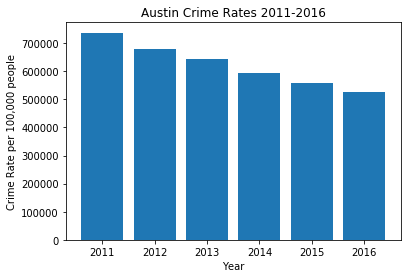

In [18]:
# Create a bar chart based off of the group series from before
# Create a bar chart based upon the above data
plt.xticks(x, year)
chart = plt.bar(x, y)
plt.title("Austin Crime Rates 2011-2016")
plt.xlabel("Year")
plt.ylabel("Crime Rate per 100,000 people")
plt.savefig("Bars.png")
plt.show()

In [19]:
df['Lat'] = ""
df['Lng'] = ""
df.head()

,year,Zip Code,Reports,Population,"Crime Rate per 100,000 people",Lat,Lng
0,2011,78610,7,22052,31.7,,
1,2011,78613,449,63901,702.6,,
2,2011,78617,1094,18572,5890.6,,
3,2011,78652,33,4256,775.4,,
4,2011,78653,97,14631,663.0,,


In [ ]:
for index,row in df.iterrows():
    zipcode = row['Zip Code']
    base_url = ('https://maps.googleapis.com/maps/api/geocode/json?''address={0}&key={1}').format(zipcode, gkey)
    # Convert to JSON
    response = requests.get(base_url).json()
    # Extract lat/lng
    df.loc[index,'Lat'] = response["results"][0]["geometry"]["location"]["lat"]
    df.loc[index,'Lng'] = response["results"][0]["geometry"]["location"]["lng"]
    df.head()

In [ ]:
gmaps.configure(api_key=gkey)
# Store latitude and longitude in locations
locations = df[["Lat", "Lng"]].astype(float)
# Fill NaN values and convert to float
crime_rate = df["Crime Rate per 100,000 people"].astype(float)

In [ ]:
fig = gmaps.figure()
# Create a heat layer
crime_zipcode = gmaps.heatmap_layer(locations, weights= crime_rate, 
                                 dissipating=True, max_intensity=150000,
                                 point_radius = 30)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
crime_zipcode.dissipating = True
crime_zipcode.max_intensity = 150000
crime_zipcode.point_radius = 30

fig.add_layer(crime_zipcode)

fig

In [ ]:
crime_count = df["Reports"].tolist()
# Create crime symbol layer
report_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=3, 
    info_box_content=[f"Crime Reports: {crime}" for crime in crime_count]
)

fig = gmaps.figure()
fig.add_layer(report_layer)

fig

In [ ]:
fig = gmaps.figure()

fig.add_layer(crime_zipcode)
fig.add_layer(report_layer)

fig